<a href="https://colab.research.google.com/github/RahulArra/Zomato-Order-Analysis/blob/main/DAV_ASSIGN_202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Zomato Dataset.csv to Zomato Dataset.csv


In [ ]:
import pandas as pd

df = pd.read_csv("Zomato Dataset.csv")
df.head()


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [ ]:
ages = df['Delivery_person_Age'].values
ratings = df['Delivery_person_Ratings'].values
time_taken = pd.to_numeric(df['Time_taken (min)'].astype(str).str.replace('min', '', regex=False), errors='coerce').values


In [ ]:
print("Ages sample:", ages[:5])
print("Ratings sample:", ratings[:5])
print("Time Taken sample:", time_taken[:5])

Ages sample: [36. 21. 23. 34. 24.]
Ratings sample: [4.2 4.7 4.7 4.3 4.7]
Time Taken sample: [46 23 21 20 41]


In [ ]:
# First 5 ages
print("First 5 Ages:", ages[:5])

# Ratings from index 3 to 8
print("Ratings [3 to 7]:", ratings[3:8])

# Last 5 delivery times
print("Last 5 Delivery Times:", time_taken[-5:])


First 5 Ages: [36. 21. 23. 34. 24.]
Ratings [3 to 7]: [4.3 4.7 4.5 4.  4.2]
Last 5 Delivery Times: [32 36 16 26 36]


In [ ]:
print("Original shape of time_taken:", time_taken.shape)


Original shape of time_taken: (45584,)


Reshaping to 2D

In [ ]:
time_taken_2d = time_taken.reshape(-1, 1)
print("Shape after reshaping to column vector:", time_taken_2d.shape)
print("First 5 rows:\n", time_taken_2d[:5])


Shape after reshaping to column vector: (45584, 1)
First 5 rows:
 [[46]
 [23]
 [21]
 [20]
 [41]]


Reshape to (rows, columns) format

In [ ]:
reshaped = time_taken[:20].reshape(4, 5)  # First 20 values as 4 rows, 5 columns
print("Reshaped to (4,5):\n", reshaped)


Reshaped to (4,5):
 [[46 23 21 20 41]
 [20 33 40 41 15]
 [36 26 20 39 34]
 [15 18 38 47 12]]


 Flatten a 2D array back to 1D

In [ ]:
flattened = reshaped.flatten()
print("Flattened back to 1D:", flattened)


Flattened back to 1D: [46 23 21 20 41 20 33 40 41 15 36 26 20 39 34 15 18 38 47 12]


 **Concatenation**

In [ ]:
time_taken_2d = time_taken.reshape(-1, 1)
ratings_2d = ratings.reshape(-1, 1)
# Horizontally concatenate ratings and time_taken
combined = np.hstack((ratings_2d, time_taken_2d))
print("Shape after hstack (side by side):", combined.shape)
print("First 5 rows:\n", combined[:5])

# Vertically stack first 5 of each
stacked = np.vstack((ratings_2d[:5], time_taken_2d[:5]))
print("Vertically stacked (ratings + time):\n", stacked)


Shape after hstack (side by side): (45584, 2)
First 5 rows:
 [[ 4.2 46. ]
 [ 4.7 23. ]
 [ 4.7 21. ]
 [ 4.3 20. ]
 [ 4.7 41. ]]
Vertically stacked (ratings + time):
 [[ 4.2]
 [ 4.7]
 [ 4.7]
 [ 4.3]
 [ 4.7]
 [46. ]
 [23. ]
 [21. ]
 [20. ]
 [41. ]]


**Splitting**

In [ ]:
# Horizontal split (split columns)
split_ratings, split_time = np.hsplit(combined, 2)
print("Split Ratings (first 5):", split_ratings[:5])
print("Split Time Taken (first 5):", split_time[:5])

# Vertical split (split rows into 2 halves)
top, bottom = np.vsplit(combined[:10], 2)
print("Top half:\n", top)
print("Bottom half:\n", bottom)


Split Ratings (first 5): [[4.2]
 [4.7]
 [4.7]
 [4.3]
 [4.7]]
Split Time Taken (first 5): [[46.]
 [23.]
 [21.]
 [20.]
 [41.]]
Top half:
 [[ 4.2 46. ]
 [ 4.7 23. ]
 [ 4.7 21. ]
 [ 4.3 20. ]
 [ 4.7 41. ]]
Bottom half:
 [[ 4.5 20. ]
 [ 4.  33. ]
 [ 4.2 40. ]
 [ 4.9 41. ]
 [ 4.7 15. ]]


 Math operations on arrays

In [ ]:
# Square root of time taken
print("√ Time Taken (first 5):", np.sqrt(time_taken[:5]))

# Exponent of ratings
print("exp(Ratings) (first 5):", np.exp(ratings[:5]))

# Log of time taken (log1p handles 0 safely as log(1 + x))
print("log(Time Taken + 1):", np.log1p(time_taken[:5]))

# Absolute values (in case of any negatives)
print("Absolute Ratings:", np.abs(ratings[:5]))

# Trigonometric just for demo (not practical here)
print("sin(Ratings):", np.sin(ratings[:5]))


# Round ratings
print("Rounded Ratings:", np.round(ratings[:5]))

# Ceiling and floor
print("Ceil Ratings:", np.ceil(ratings[:5]))
print("Floor Ratings:", np.floor(ratings[:5]))

# Check where rating > 4
print("Ratings > 4:", ratings[:5] > 4)



√ Time Taken (first 5): [6.78232998 4.79583152 4.58257569 4.47213595 6.40312424]
exp(Ratings) (first 5): [ 66.68633104 109.94717245 109.94717245  73.6997937  109.94717245]
log(Time Taken + 1): [3.8501476  3.17805383 3.09104245 3.04452244 3.73766962]
Absolute Ratings: [4.2 4.7 4.7 4.3 4.7]
sin(Ratings): [-0.87157577 -0.99992326 -0.99992326 -0.91616594 -0.99992326]
Rounded Ratings: [4. 5. 5. 4. 5.]
Ceil Ratings: [5. 5. 5. 5. 5.]
Floor Ratings: [4. 4. 4. 4. 4.]
Ratings > 4: [ True  True  True  True  True]


**Aggregation functions**

In [ ]:
print("Mean Age:", np.nanmean(ages))
print("Mean Rating:", np.nanmean(ratings))
print("Mean Time Taken:", np.nanmean(time_taken))

print("Max Age:", np.nanmax(ages))
print("Min Rating:", np.nanmin(ratings))

print("Standard Deviation (Time Taken):", np.nanstd(time_taken))
print("Variance (Ratings):", np.nanvar(ratings))

print("Sum of Time Taken:", np.nansum(time_taken))
print("Count of non-null Ages:", np.count_nonzero(~np.isnan(ages)))


Mean Age: 29.566910587697233
Mean Rating: 4.6337736972250205
Mean Time Taken: 26.293962793962795
Max Age: 50.0
Min Rating: 1.0
Standard Deviation (Time Taken): 9.384194798984712
Variance (Ratings): 0.1120507926372235
Sum of Time Taken: 1198584
Count of non-null Ages: 43730


In [ ]:
# Combine ratings and time_taken for demo
combined = np.hstack((ratings.reshape(-1,1), time_taken.reshape(-1,1)))

print("Column-wise Mean (Ratings, Time):", np.nanmean(combined, axis=0))
print("Row-wise Sum (first 5):", np.nansum(combined[:5], axis=1))


Column-wise Mean (Ratings, Time): [ 4.6337737  26.29396279]
Row-wise Sum (first 5): [50.2 27.7 25.7 24.3 45.7]


 Broadcasting — NumPy with Zomato Data

In [ ]:
# Broadcast a row to all rows
adjustment = np.array([0.5, 10])  # Add 0.5 to ratings, 10 to time

combined = np.hstack((ratings.reshape(-1,1), time_taken.reshape(-1,1)))
broadcasted_result = combined[:5] + adjustment
print("Broadcasted addition (ratings+0.5, time+10):\n", broadcasted_result)


Broadcasted addition (ratings+0.5, time+10):
 [[ 4.7 56. ]
 [ 5.2 33. ]
 [ 5.2 31. ]
 [ 4.8 30. ]
 [ 5.2 51. ]]


In [ ]:
print("Time Taken in Hours:\n", time_taken[:5] / 60)


Time Taken in Hours:
 [0.76666667 0.38333333 0.35       0.33333333 0.68333333]


 Boolean Masking

In [ ]:
# Delivery persons with rating > 4.5
high_rated = ratings > 4.5
print("High Rated Boolean Mask (first 10):", high_rated[:10])

# Ages of highly-rated delivery persons
print("Ages with rating > 4.5:\n", ages[high_rated])


High Rated Boolean Mask (first 10): [False  True  True False  True False False False  True  True]
Ages with rating > 4.5:
 [21. 23. 24. ... 30. 20. 23.]
Matching Ages:
 [21. 23. 34. ... 28. 30. 20.]
Matching Time Taken:
 [23 21 20 ... 29 16 26]


In [ ]:
# Deliveries with rating > 4 AND time taken < 30
mask = (ratings > 4) & (time_taken < 30)
print("Matching Ages:\n", ages[mask])
print("Matching Time Taken:\n", time_taken[mask])


Matching Ages:
 [21. 23. 34. ... 28. 30. 20.]
Matching Time Taken:
 [23 21 20 ... 29 16 26]


Fancy Indexing

In [ ]:
# Ratings at specific row indices
indices = [0, 2, 5, 9]
print("Ratings at indices [0,2,5,9]:", ratings[indices])

# Top 5 highest rated deliveries
top5_idx = np.argsort(ratings)[-5:]
print("Top 5 Ratings:", ratings[top5_idx])
print("Time Taken for Top 5 Ratings:", time_taken[top5_idx])

Ratings at indices [0,2,5,9]: [4.2 4.7 4.5 4.7]
Top 5 Ratings: [nan nan nan nan nan]
Time Taken for Top 5 Ratings: [49 19 26 49 44]


In [ ]:
#  Remove NaNs from age and use clean arrays
valid_mask = ~np.isnan(ages)
clean_ages = ages[valid_mask]
clean_ratings = ratings[valid_mask]
clean_time = time_taken[valid_mask]
print("Clean Ages (no NaNs):", clean_ages[:5])

Clean Ages (no NaNs): [36. 21. 23. 34. 24.]


sorting

In [ ]:
 #Sort delivery time (ascending)
sorted_time = np.sort(time_taken)
print("Sorted Time Taken (Ascending):", sorted_time[:10])

#  Sort ratings (descending)
sorted_ratings_desc = np.sort(ratings)[::-1]
print("Sorted Ratings (Descending):", sorted_ratings_desc[:10])

#  Get indices that would sort time_taken
time_order = np.argsort(time_taken)
print("Indices that sort time:", time_order[:10])

#  Use sorting indices to sort corresponding ages
sorted_ages_by_time = ages[time_order]
print("Ages sorted by delivery time:", sorted_ages_by_time[:10])


Sorted Time Taken (Ascending): [10 10 10 10 10 10 10 10 10 10]
Sorted Ratings (Descending): [nan nan nan nan nan nan nan nan nan nan]
Indices that sort time: [31937    66 37845 37853 41840 24866   825 30633 40227 17186]
Ages sorted by delivery time: [27. 26. 35. 29. nan 39. 33. 25. 23. 29.]


# **PANDAS OPERATIONS**

**Series**

In [ ]:
# Series from numeric column
age_series = df['Delivery_person_Age']
print("Age Series:\n", age_series.head())

# Series from float column
rating_series = df['Delivery_person_Ratings']
print("\nRating Series:\n", rating_series.head())

# Series from categorical column
city_series = df['City']
print("\nCity Series:\n", city_series.head())

# Series from boolean/festival column
festival_series = df['Festival']
print("\nFestival Series:\n", festival_series.head())


Age Series:
 0    36.0
1    21.0
2    23.0
3    34.0
4    24.0
Name: Delivery_person_Age, dtype: float64

Rating Series:
 0    4.2
1    4.7
2    4.7
3    4.3
4    4.7
Name: Delivery_person_Ratings, dtype: float64

City Series:
 0    Metropolitian
1    Metropolitian
2    Metropolitian
3    Metropolitian
4    Metropolitian
Name: City, dtype: object

Festival Series:
 0    No
1    No
2    No
3    No
4    No
Name: Festival, dtype: object


Custom Index Series

In [ ]:
# Ratings with Delivery_person_ID as index
ratings_with_id = pd.Series(df['Delivery_person_Ratings'].values, index=df['Delivery_person_ID'])
print("\nCustom Indexed Series (Ratings by ID):\n", ratings_with_id.head())



Custom Indexed Series (Ratings by ID):
 Delivery_person_ID
DEHRES17DEL01     4.2
KOCRES16DEL01     4.7
PUNERES13DEL03    4.7
LUDHRES15DEL02    4.3
KNPRES14DEL02     4.7
dtype: float64


In [ ]:
# Ratings with Delivery_person_ID as index
ratings_with_id = pd.Series(df['Delivery_person_Ratings'].values, index=df['Delivery_person_ID'])
print("\nCustom Indexed Series (Ratings by ID):\n", ratings_with_id.head())

# Series Properties
print("Mean Age (excluding nulls):", age_series.mean())
print("Max Rating:", rating_series.max())
print("Unique Cities:\n", city_series.unique())
print("City value counts:\n", city_series.value_counts())



Custom Indexed Series (Ratings by ID):
 Delivery_person_ID
DEHRES17DEL01     4.2
KOCRES16DEL01     4.7
PUNERES13DEL03    4.7
LUDHRES15DEL02    4.3
KNPRES14DEL02     4.7
dtype: float64
Mean Age (excluding nulls): 29.566910587697233
Max Rating: 6.0
Unique Cities:
 ['Metropolitian' 'Urban' 'Semi-Urban' nan]
City value counts:
 City
Metropolitian    34087
Urban            10133
Semi-Urban         164
Name: count, dtype: int64


**DataFrame**

In [ ]:
print("Shape of DataFrame (rows, columns):", df.shape)
print("\nColumn Names:\n", df.columns)
print("\nData Types of Columns:\n", df.dtypes)


Shape of DataFrame (rows, columns): (45584, 20)

Column Names:
 Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

Data Types of Columns:
 ID                              object
Delivery_person_ID              object
Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weather_

Accessing rows

In [ ]:
print("First Row:\n", df.iloc[0])
print("\nRow with index 10:\n", df.iloc[10])
selected = df[['Delivery_person_ID', 'City', 'Festival', 'Type_of_order']]
print("Selected Columns:\n", selected.head())


First Row:
 ID                                    0xcdcd
Delivery_person_ID             DEHRES17DEL01
Delivery_person_Age                     36.0
Delivery_person_Ratings                  4.2
Restaurant_latitude                30.327968
Restaurant_longitude               78.046106
Delivery_location_latitude         30.397968
Delivery_location_longitude        78.116106
Order_Date                        12-02-2022
Time_Orderd                            21:55
Time_Order_picked                      22:10
Weather_conditions                       Fog
Road_traffic_density                     Jam
Vehicle_condition                          2
Type_of_order                          Snack
Type_of_vehicle                   motorcycle
multiple_deliveries                      3.0
Festival                                  No
City                           Metropolitian
Time_taken (min)                          46
Name: 0, dtype: object

Row with index 10:
 ID                                     0x36b

creating new colums

In [ ]:
df['Order_Year'] = pd.to_datetime(df['Order_Date'], dayfirst=True).dt.year
print("Order_Year column added:\n", df[['Order_Date', 'Order_Year']].head())


Order_Year column added:
    Order_Date  Order_Year
0  12-02-2022        2022
1  13-02-2022        2022
2  04-03-2022        2022
3  13-02-2022        2022
4  14-02-2022        2022


In [ ]:
# Single column as a Series
print(df['Delivery_person_Age'].head())
print()

# Multiple columns as a DataFrame
print(df[['Delivery_person_Age', 'Delivery_person_Ratings', 'City']].head())
print()

# Access row by label-based indexing (for row label/index)
print(df.loc[0])     # First row

print()
# Access row by integer position
print(df.iloc[2])    # Third row

print()

# Using .loc[row_label, column_label]
print(df.loc[0, 'City'])
print()

# Using .iloc[row_position, column_position]
print(df.iloc[4, 10])   # For example, 5th row, 11th column (like Time_Order_picked)


0    36.0
1    21.0
2    23.0
3    34.0
4    24.0
Name: Delivery_person_Age, dtype: float64

   Delivery_person_Age  Delivery_person_Ratings           City
0                 36.0                      4.2  Metropolitian
1                 21.0                      4.7  Metropolitian
2                 23.0                      4.7  Metropolitian
3                 34.0                      4.3  Metropolitian
4                 24.0                      4.7  Metropolitian

ID                                    0xcdcd
Delivery_person_ID             DEHRES17DEL01
Delivery_person_Age                     36.0
Delivery_person_Ratings                  4.2
Restaurant_latitude                30.327968
Restaurant_longitude               78.046106
Delivery_location_latitude         30.397968
Delivery_location_longitude        78.116106
Order_Date                        12-02-2022
Time_Orderd                            21:55
Time_Order_picked                      22:10
Weather_conditions               

**INDEX ALIGNMENT & OPERATIONS BETWEEN SERIES AND DATAFRAMES**

In [ ]:
# Series: average value of each numeric column
column_means = df[['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition', 'Time_taken (min)']].mean()
print("Column-wise Means:\n", column_means)

# Subset DataFrame with numeric columns
numeric_df = df[['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition', 'Time_taken (min)']]

# Subtract column means from each row
centered_df = numeric_df - column_means
print("\nCentered Data (each value - column mean):\n", centered_df.head())

# Series with a value per row
time_taken_series = df['Time_taken (min)']

# Broadcast row-wise operation: add time_taken_series to each column
added_time_df = numeric_df.add(time_taken_series, axis=0)  # aligns on row index
print("\nEach numeric column + time_taken:\n", added_time_df.head())

# Misaligned Series  — auto aligns only matching indexes
limited_series = pd.Series([100, 200, 300], index=[0, 1, 2])
misaligned_added = df['Time_taken (min)'] + limited_series
print("\nAddition with partially matching indexes (index alignment):\n", misaligned_added.head())


Column-wise Means:
 Delivery_person_Age        29.566911
Delivery_person_Ratings     4.633774
Vehicle_condition           1.023385
Time_taken (min)           26.293963
dtype: float64

Centered Data (each value - column mean):
    Delivery_person_Age  Delivery_person_Ratings  Vehicle_condition  \
0             6.433089                -0.433774           0.976615   
1            -8.566911                 0.066226          -0.023385   
2            -6.566911                 0.066226          -0.023385   
3             4.433089                -0.333774          -1.023385   
4            -5.566911                 0.066226          -0.023385   

   Time_taken (min)  
0         19.706037  
1         -3.293963  
2         -5.293963  
3         -6.293963  
4         14.706037  

Each numeric column + time_taken:
    Delivery_person_Age  Delivery_person_Ratings  Vehicle_condition  \
0                 82.0                     50.2                 48   
1                 44.0                     2

**Handling missing data**

In [ ]:
# Check nulls
print(df.isnull().sum())
print("Total nulls:", df.isnull().sum().sum())

# View rows with any nulls
print(df[df.isnull().any(axis=1)].head())

# Specific column nulls
print(df[df['Delivery_person_Age'].isnull()].head())

# Drop null rows
df_dropped = df.dropna()
print("Shape after dropna:", df_dropped.shape)

# Fill age with mean
df_age_filled = df.copy()
df_age_filled['Delivery_person_Age'] = df_age_filled['Delivery_person_Age'].fillna(df['Delivery_person_Age'].mean())
print(df_age_filled['Delivery_person_Age'].head())

# Fill weather with mode
df_weather_filled = df.copy()
df_weather_filled['Weather_conditions'] = df_weather_filled['Weather_conditions'].fillna(df['Weather_conditions'].mode()[0])
print(df_weather_filled['Weather_conditions'].head())

# Backward fill city
df_bfill = df.copy()
df_bfill['City'] = df_bfill['City'].fillna(method='bfill')
print(df_bfill['City'].head())


ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
Order_Year                        0
dtype: int64
Total nulls: 9131
        ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  \
8   0x6f67      HYDRES14DEL01                 34.0                      4.9   
33   0x4f0      MUMRES17DEL02                  NaN     

<ipython-input-100-745c3e7550dd>:27: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill['City'] = df_bfill['City'].fillna(method='bfill')


**Hierarchical Indexing**

In [ ]:
# Seting MultiIndex
df_multi = df.set_index(['City', 'Type_of_order'])
print("MultiIndex DataFrame:\n", df_multi.head())

# Accesing rows using   tuple
print("\nAccessing rows for ('Urban', 'Snack'):\n", df_multi.loc[('Urban', 'Snack')].head())

# Resetting index back to default integer index
df_reset = df_multi.reset_index()
print("\nReset index:\n", df_reset.head())

# Create custom MultiIndex DataFrame
multi_index = pd.MultiIndex.from_tuples(
    [('Urban', 'Snack'), ('Urban', 'Meal'), ('Semi-Urban', 'Buffet')],
    names=['City', 'Order_Type']
)
df_custom = pd.DataFrame({'Ratings': [4.6, 4.2, 3.8]}, index=multi_index)
print("\nCustom MultiIndex DataFrame:\n", df_custom)

# Swap index levels
df_swapped = df_multi.swaplevel()
print("\nSwapped index levels:\n", df_swapped.head())

# Sort by index
df_sorted = df_multi.sort_index()
print("\nSorted MultiIndex DataFrame:\n", df_sorted.head())


MultiIndex DataFrame:
                                  ID Delivery_person_ID  Delivery_person_Age  \
City          Type_of_order                                                   
Metropolitian Snack          0xcdcd      DEHRES17DEL01                 36.0   
              Meal           0xd987      KOCRES16DEL01                 21.0   
              Drinks         0x2784     PUNERES13DEL03                 23.0   
              Buffet         0xc8b6     LUDHRES15DEL02                 34.0   
              Snack          0xdb64      KNPRES14DEL02                 24.0   

                             Delivery_person_Ratings  Restaurant_latitude  \
City          Type_of_order                                                 
Metropolitian Snack                              4.2            30.327968   
              Meal                               4.7            10.003064   
              Drinks                             4.7            18.562450   
              Buffet                  

<ipython-input-103-542dc60fbd23>:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  print("\nAccessing rows for ('Urban', 'Snack'):\n", df_multi.loc[('Urban', 'Snack')].head())


### **Pivot Tables**

In [ ]:
pivot1 = pd.pivot_table(df, index='City', values='Time_taken (min)', aggfunc='mean')
print("Pivot Table 1: Average Time Taken by City\n", pivot1)

# Compare with groupby
group1 = df.groupby('City')['Time_taken (min)'].mean()
print("\nGroupBy Result:\n", group1)


Pivot Table 1: Average Time Taken by City
                Time_taken (min)
City                           
Metropolitian         27.314460
Semi-Urban            49.731707
Urban                 22.983322

GroupBy Result:
 City
Metropolitian    27.314460
Semi-Urban       49.731707
Urban            22.983322
Name: Time_taken (min), dtype: float64


In [ ]:
pivot2 = pd.pivot_table(df, index='City', columns='Type_of_order', values='ID', aggfunc='count')
print("\nPivot Table 2: Order Count by City and Type of Order\n", pivot2)

# Compare with groupby
group2 = df.groupby(['City', 'Type_of_order'])['ID'].count().unstack()
print("\nGroupBy Result:\n", group2)



Pivot Table 2: Order Count by City and Type of Order
 Type_of_order  Buffet  Drinks  Meal  Snack
City                                      
Metropolitian    8425    8435  8662   8565
Semi-Urban         42      34    34     54
Urban            2507    2566  2485   2575

GroupBy Result:
 Type_of_order  Buffet  Drinks  Meal  Snack
City                                      
Metropolitian    8425    8435  8662   8565
Semi-Urban         42      34    34     54
Urban            2507    2566  2485   2575


**Operatiosn on Matplotlib**

In [ ]:
import matplotlib.pyplot as plt


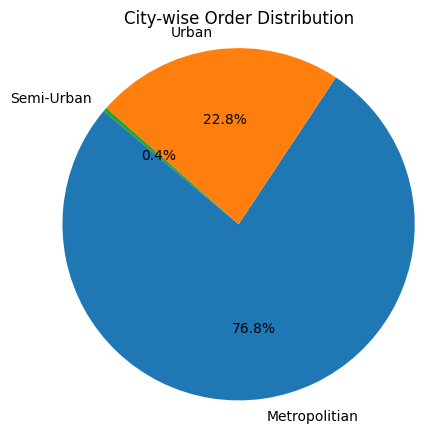

In [ ]:
city_counts = df['City'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('City-wise Order Distribution')
plt.axis('equal')
plt.show()


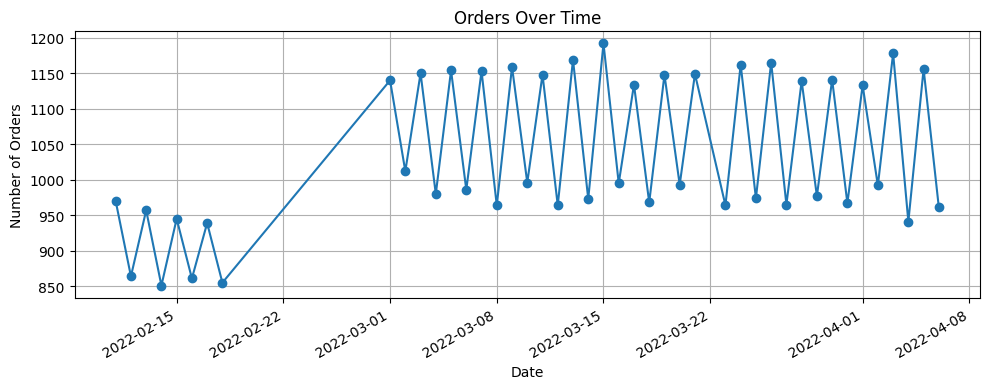

In [ ]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True)
daily_orders = df.groupby('Order_Date').size()

plt.figure(figsize=(10, 4))
daily_orders.plot(kind='line', marker='o', linestyle='-')
plt.title('Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.tight_layout()
plt.show()


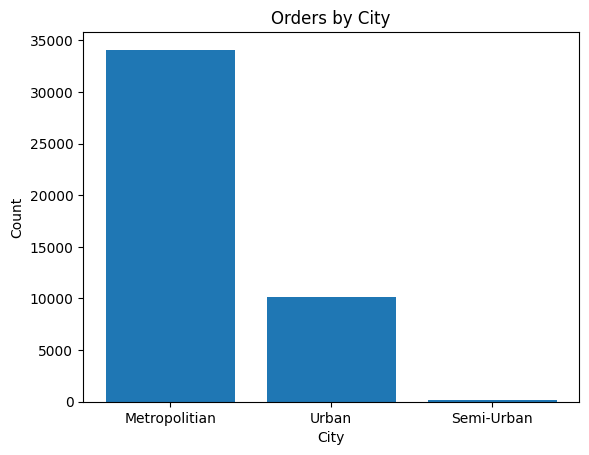

In [ ]:
city_counts = df['City'].value_counts()

plt.bar(city_counts.index, city_counts.values)
plt.title('Orders by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()


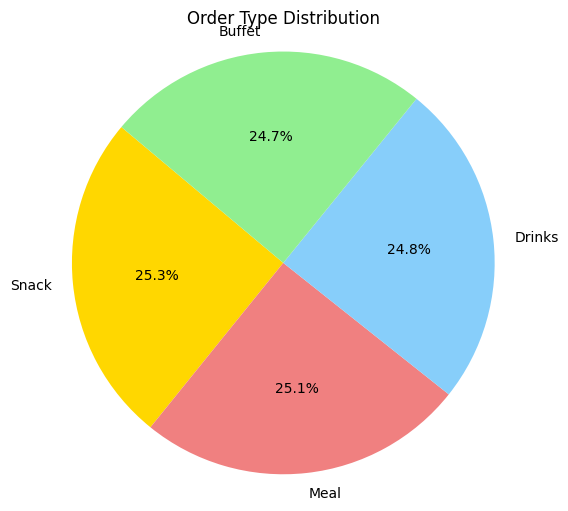

In [ ]:
order_types = df['Type_of_order'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(order_types, labels=order_types.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Order Type Distribution')
plt.axis('equal')
plt.show()


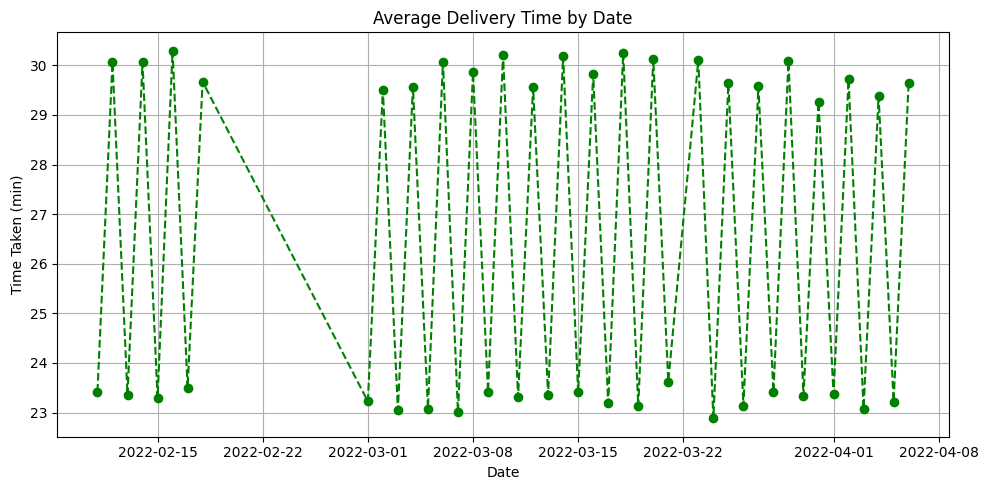

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True)
daily_avg = df.groupby('Order_Date')['Time_taken (min)'].mean()

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg.values, color='green', linestyle='--', marker='o')
plt.title('Average Delivery Time by Date')
plt.xlabel('Date')
plt.ylabel('Time Taken (min)')
plt.grid(True)
plt.tight_layout()
plt.show()
